In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import load_img
from ann_visualizer.visualize import ann_viz

Using TensorFlow backend.
W0916 19:36:37.385692 140735713981312 __init__.py:308] Limited tf.compat.v2.summary API due to missing TensorBoard installation.


In [2]:
seed = 7
np.random.seed(seed)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_cols, img_rows, 1)
X_test = X_test.reshape(X_test.shape[0], img_cols, img_rows, 1)



In [4]:
X_train = X_train / 255
X_test = X_test / 255

In [5]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]



In [6]:
def larger_model():
    
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(img_cols, img_rows, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [7]:
model = larger_model()

W0916 19:40:36.014190 140735713981312 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0916 19:40:36.041146 140735713981312 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0916 19:40:36.043623 140735713981312 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0916 19:40:36.069682 140735713981312 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0916 19:40:36.091204 140735713981312 deprecation_w

In [8]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

W0916 19:40:48.974810 140735713981312 deprecation.py:323] From //anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 45s 747us/step - loss: 0.3839 - acc: 0.8834 - val_loss: 0.0820 - val_acc: 0.9743
Epoch 2/10
60000/60000 [==============================] - 47s 782us/step - loss: 0.1015 - acc: 0.9686 - val_loss: 0.0605 - val_acc: 0.9797
Epoch 3/10
60000/60000 [==============================] - 46s 766us/step - loss: 0.0728 - acc: 0.9778 - val_loss: 0.0403 - val_acc: 0.9869
Epoch 4/10
60000/60000 [==============================] - 46s 766us/step - loss: 0.0594 - acc: 0.9815 - val_loss: 0.0357 - val_acc: 0.9886
Epoch 5/10
60000/60000 [==============================] - 46s 774us/step - loss: 0.0492 - acc: 0.9849 - val_loss: 0.0347 - val_acc: 0.9893
Epoch 6/10
60000/60000 [==============================] - 47s 777us/step - loss: 0.0443 - acc: 0.9864 - val_loss: 0.0298 - val_acc: 0.9902
Epoch 7/10
60000/60000 [==============================] - 47s 779us/step - loss: 0.0387 - acc: 0.9881 - val_loss: 0.

In [9]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Accuracy: %.2f%%" % (scores[1]*100))

Large CNN Accuracy: 99.02%


In [10]:
ann_viz(model, title='A CNN model to identify handwritten digits')

In [11]:
img = load_img('im8.jpg')

In [12]:
img.size

(250, 250)

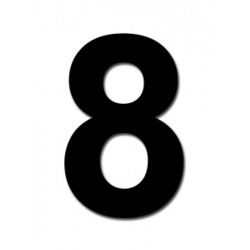

In [13]:
img

In [14]:
img = np.resize(img,(28,28))
img = np.reshape(img,[1,28,28, 1])

In [15]:
pred= model.predict([img])

In [16]:
pred

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [17]:
val = np.argmax(pred)

In [18]:
val

8